In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import random
from adjustText import adjust_text

# Save embeddings to CSV files
embeddings = pd.read_csv("../extra/celltype_ann/embeddings.csv", index_col=0)
embeddings_ann = pd.read_csv("../extra/celltype_ann/embeddings_ann.csv", index_col=0)

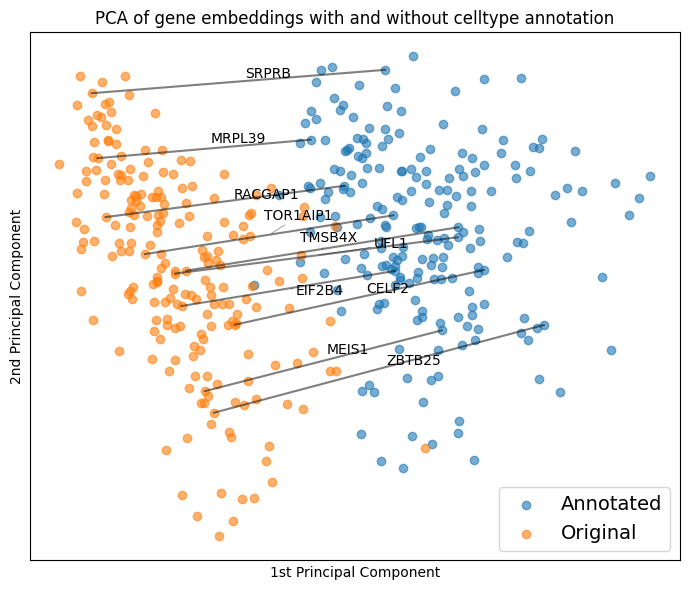

Sampled genes: ['TOR1AIP1', 'MEIS1', 'EIF2B4', 'UFL1', 'TMSB4X', 'SRPRB', 'RACGAP1', 'CELF2', 'ZBTB25', 'MRPL39']


In [2]:
########################### PCA ###########################
combined = np.vstack([embeddings.values, embeddings_ann.values])
emb_2d = PCA(n_components=2).fit_transform(combined)

df_plot = pd.DataFrame(emb_2d, columns=["PC1", "PC2"])
df_plot["source"] = ["Original"] * len(embeddings) + ["Annotated"] * len(embeddings_ann)
df_plot["gene"] = list(embeddings.index) + list(embeddings_ann.index)

df_orig = df_plot[df_plot["source"] == "Original"].set_index("gene")
df_ann = df_plot[df_plot["source"] == "Annotated"].set_index("gene")

random.seed(2)
sampled_genes = random.sample(list(df_orig.index), 10)

plt.figure(figsize=(7, 6))
for label, group in df_plot.groupby("source"):
    plt.scatter(group["PC1"], group["PC2"], label=label, alpha=0.6)

texts = []
for gene in sampled_genes:
    if gene in df_ann.index:  # sanity check
        x1, y1 = df_orig.loc[gene, ["PC1", "PC2"]]
        x2, y2 = df_ann.loc[gene, ["PC1", "PC2"]]
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.5)

        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        texts.append(plt.text(mid_x, mid_y, gene))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("PCA of gene embeddings with and without celltype annotation")
plt.legend(fontsize=14)
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.show()

print("Sampled genes:", sampled_genes)
